In [ ]:
import pandas as pd
import numpy as np
import copy
file_str = 'C:/Users/16010/Desktop/aaaa.xlsx'
data = pd.read_excel(file_str,header=None,sep=' ').values

m = data.shape[0]      #样本个数
n = data.shape[1] - 1    #特征个数
n_1 = n

x_data = data[:,0:n_1].astype(np.float32)
y_data = data[:,n:n+1]
y_tag_five = copy.copy(y_data)
for it in y_data:
    if it[0] == '0': it[0] = 0
    elif it[0] == '1': it[0] = 0
    elif it[0] == '2': it[0] = 0
    elif it[0] == '3': it[0] = 1
        
print(len(x_data))
print(len(x_data[0]))

for row in range(len(x_data)):
    if x_data[row][0] <= 236844.92: x_data[row][0] = 2
    elif x_data[row][0] > 236844.92 and x_data[row][0] <= 17741990.19: x_data[row][0] = 1
    elif x_data[row][0] > 17741990.19: x_data[row][0] = 0
        
    if x_data[row][1] <= -0.76203012: x_data[row][1] = 3
    elif x_data[row][1] > -0.76203012 and x_data[row][1] <= -0.26801377: x_data[row][1] = 2
    elif x_data[row][1] > -0.26801377 and x_data[row][1] <= 2.43137250: x_data[row][1] = 1
    elif x_data[row][1] > 2.43137250: x_data[row][1] = 0
        
    if x_data[row][2] <= -0.30841038: x_data[row][2] = 3
    elif x_data[row][2] > -0.30841038 and x_data[row][2] <= 0.08465820: x_data[row][2] = 2
    elif x_data[row][2] > 0.08465820 and x_data[row][2] <= 1.89545480: x_data[row][2] = 1
    elif x_data[row][2] > 1.89545480: x_data[row][2] = 0
        
    if x_data[row][3] <= 0.34924501: x_data[row][3] = 4
    elif x_data[row][3] > 0.34924501 and x_data[row][3] <= 0.46014173: x_data[row][3] = 0
    elif x_data[row][3] > 0.46014173 and x_data[row][3] <= 0.68449903: x_data[row][3] = 1
    elif x_data[row][3] > 0.68449903 and x_data[row][3] <= 0.76773242: x_data[row][3] = 2
    elif x_data[row][3] > 0.76773242: x_data[row][3] = 3
        
    if x_data[row][4] <= 1: x_data[row][4] = 2
    elif x_data[row][4] > 1 and x_data[row][4] <= 4: x_data[row][4] = 1
    elif x_data[row][4] > 4: x_data[row][4] = 0

        
print(type(x_data))
A = pd.DataFrame(x_data)
writer = pd.ExcelWriter('C:/Users/16010/Desktop/re_tag.xlsx')
A.to_excel(writer,'page_1',float_format='%.5f')
writer.save()
writer.close()

In [1]:
#BLOCK1
#二分类，然后再针对回归值进行细分，实现五分类，程序包含BLOCK1
#目前这个程序有问题，二分类（ABC，DE）的正确率有50/60，但细分的时候因为回归值的规律不明显
#（一般规律为A的回归值离0近，B的回归值离0第二近，C离0.5-比较近，D离0.5+比较进，E离1比较近）
#原因可能主要是标签打得不准
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy

def sigmoid(x):
    # TODO: Implement sigmoid function
    return 1/(1 + tf.exp(-x))

file_str = 'C:/Users/16010/Desktop/train.xlsx'
data = pd.read_excel(file_str,header=None,sep=' ').values

m = data.shape[0]      #样本个数
n = data.shape[1] - 1    #特征个数
n_1 = n

x_data = data[:,0:n_1].astype(np.float32)
y_data = data[:,n:n+1]
y_tag_five = copy.copy(y_data)
for it in y_data:
    if it[0] == 0: it[0] = 0
    elif it[0] == 1: it[0] = 0
    elif it[0] == 2: it[0] = 0
    elif it[0] == 3: it[0] = 1

#print(y_data)
#mean = x_data.mean(axis=0)
#std = x_data.std(axis=0)
#x_data = ((x_data-mean)/std)

#woe归一化
#for row in range(len(x_data)):
#    if x_data[row][0] <= 236844.92: x_data[row][0] = 2.517696473
#    elif x_data[row][0] > 236844.92 and x_data[row][0] <= 17741990.19: x_data[row][0] = -0.965739007
#    elif x_data[row][0] > 17741990.19: x_data[row][0] = -1.203972804
#        
#    if x_data[row][1] <= -0.76203012: x_data[row][1] = 3.433987204
#    elif x_data[row][1] > -0.76203012 and x_data[row][1] <= -0.26801377: x_data[row][1] = 2.006870849
#    elif x_data[row][1] > -0.26801377 and x_data[row][1] <= 2.43137250: x_data[row][1] = -1.185367616
#    elif x_data[row][1] > 2.43137250: x_data[row][1] = -1.641186611
#        
#    if x_data[row][2] <= -0.30841038: x_data[row][2] = 3.210843653
#    elif x_data[row][2] > -0.30841038 and x_data[row][2] <= 0.08465820: x_data[row][2] = 0.032889823
#    elif x_data[row][2] > 0.08465820 and x_data[row][2] <= 1.89545480: x_data[row][2] = -0.323885121
#    elif x_data[row][2] > 1.89545480: x_data[row][2] = -0.382725621
#        
#    if x_data[row][3] <= 0.34924501: x_data[row][3] = 1.131402111
#    elif x_data[row][3] > 0.34924501 and x_data[row][3] <= 0.46014173: x_data[row][3] = -0.814508038
#    elif x_data[row][3] > 0.46014173 and x_data[row][3] <= 0.68449903: x_data[row][3] = -0.419195301
#    elif x_data[row][3] > 0.68449903 and x_data[row][3] <= 0.76773242: x_data[row][3] = 0.284104251
#    elif x_data[row][3] > 0.76773242: x_data[row][3] = 0.320471895
#        
#    if x_data[row][4] <= 1: x_data[row][4] = 0.651829031
#    elif x_data[row][4] > 1 and x_data[row][4] <= 4: x_data[row][4] = 0.106897795
#    elif x_data[row][4] > 4: x_data[row][4] = -1.266493161
        
for row in range(len(x_data)):
    if x_data[row][0] <= 236844.92: x_data[row][0] = 1.822531128
    elif x_data[row][0] > 236844.92 and x_data[row][0] <= 17741990.19: x_data[row][0] = -0.680075099
    elif x_data[row][0] > 17741990.19: x_data[row][0] = -1.355522702
        
    if x_data[row][1] <= -0.71404931: x_data[row][1] = 3.814961293
    elif x_data[row][1] > -0.71404931 and x_data[row][1] <= -0.26801377: x_data[row][1] = 2.20552338
    elif x_data[row][1] > -0.26801377 and x_data[row][1] <= 2.43137250: x_data[row][1] = -2.926739402
    elif x_data[row][1] > 2.43137250: x_data[row][1] = -1.355522702
        
    if x_data[row][2] <= -0.30841038: x_data[row][2] = 2.1102132
    elif x_data[row][2] > -0.30841038 and x_data[row][2] <= 0.08465820: x_data[row][2] = -0.528844129
    elif x_data[row][2] > 0.08465820 and x_data[row][2] <= 1.89545480: x_data[row][2] = -0.693147181
    elif x_data[row][2] > 1.89545480: x_data[row][2] = 0.010152371
        
    if x_data[row][3] <= 0.34924501: x_data[row][3] = 1.41706602
    elif x_data[row][3] > 0.34924501 and x_data[row][3] <= 0.46014173: x_data[row][3] = -1.718428196
    elif x_data[row][3] > 0.46014173 and x_data[row][3] <= 0.68449903: x_data[row][3] = -0.528844129
    elif x_data[row][3] > 0.68449903 and x_data[row][3] <= 0.76773242: x_data[row][3] = 1.011600912
    elif x_data[row][3] > 0.76773242: x_data[row][3] = 0.213093215
        
    if x_data[row][4] <= 1: x_data[row][4] = 0.679467077
    elif x_data[row][4] > 1 and x_data[row][4] <= 4: x_data[row][4] = -0.310154928
    elif x_data[row][4] > 4: x_data[row][4] = -0.407483272
#print(x_data)
x_data = x_data.T



x = tf.placeholder(tf.float32, shape=[n_1,m], name='x')
y = tf.placeholder(tf.float32, shape=[m,1], name='y')


#w = tf.Variable(tf.random_normal([n_1,1]))
#b = tf.Variable(0.0)
regularizer = tf.contrib.layers.l1_regularizer(1.0)
w = tf.get_variable('w', [n_1,1], initializer=tf.random_normal_initializer())
b = tf.get_variable('b', [1], initializer=tf.random_normal_initializer())

tf.contrib.layers.apply_regularization(regularizer, weights_list=[w, b])

z = tf.matmul(w, x, transpose_a=True)
z = tf.transpose(z)
z = tf.add(z, b)

y_hat = 1/(1 + tf.exp(-z))

#loss = tf.reduce_mean(tf.square(y - y_hat, name='loss'))

loss = tf.reduce_mean(-y*tf.log(y_hat + 1e-10)-(1-y)*tf.log(1-y_hat + 1e-10))

#optimizer = tf.train.FtrlOptimizer(learning_rate=0.001, l1_regularization_strength=0.5).minimize(loss)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)
optimizer = tf.train.AdamOptimizer(0.01).minimize(loss)

init_op = tf.global_variables_initializer()
total = []





with tf.Session() as sess:
    sess.run(init_op)
    
    writer = tf.summary.FileWriter("E://TensorBoard//test",sess.graph)
    
    for i in range(801):
        _, l, y_hat_value = sess.run([optimizer, loss, y_hat], feed_dict={x:x_data, y:y_data})
        total.append(l)
        if(i % 50 == 0):
            accuracy = 0
            #print(y_data,y_hat_value)
            for j in range(len(y_data)):
                
                if y_data[j] == 1 and y_hat_value[j] > 0.5:
                    accuracy = accuracy + 1
                elif y_data[j] == 0 and y_hat_value[j] < 0.5:
                    accuracy = accuracy + 1
            print('epoch{0}:loss{1}'.format(i,l))
            print('right{0} in {1}'.format(accuracy,m))
            print(sess.run([w,b]))
            #print(y_hat_value)
    writer.close()
    w_value = sess.run(w)
    b_value = sess.run(b)
    y_hat_value = sess.run(y_hat, feed_dict={x:x_data, y:y_data})
    print(w_value)
    print(b_value)
    #print(y_hat_value)
    
#    #以下部分为细分ABC和DE的过程
#    #但先来只代码神兽保佑
#    #      
#    #          ┌─┐       ┌─┐
#    #       ┌──┘ ┴───────┘ ┴──┐
#    #       │                 │
#    #       │       ───       │
#    #       │  ─┬┘       └┬─  │
#    #       │                 │
#    #       │       ─┴─       │
#    #       │                 │
#    #       └───┐         ┌───┘
#    #           │         │
#    #           │         │
#    #           │         │
#    #           │         └──────────────┐
#    #           │                        │
#    #           │                        ├─┐
#    #           │                        ┌─┘    
#    #           │                        │
#    #           └─┐  ┐  ┌───────┬──┐  ┌──┘         
#    #             │ ─┤ ─┤       │ ─┤ ─┤         
#    #             └──┴──┘       └──┴──┘ 
#    #                 神兽保佑 
#    #                 代码无BUG! 
#    #好，开始写了
#    
    #根据logistics回归值然后进行细分的界限
    #[0,lab]：A-----[lab,lbc]：B ------[lbc,0.5]：C----------[0.5,lde]：D----------[lde,1]：E
    #初值随便取，无所谓，取得不好训练慢而已
    


C:\Users\16010\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\16010\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\16010\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\16010\AppData\Roaming\Python\Python36\site-

epoch0:loss0.22190819680690765
right89 in 97
[array([[ 1.3784779 ],
       [ 0.13934258],
       [-0.71425295],
       [ 0.21734191],
       [ 0.32195443]], dtype=float32), array([-1.068436], dtype=float32)]
epoch50:loss0.15463463962078094
right92 in 97
[array([[ 1.6650645 ],
       [ 0.16770545],
       [-0.313351  ],
       [ 0.6646007 ],
       [ 0.69865465]], dtype=float32), array([-1.5050472], dtype=float32)]
epoch100:loss0.13389354944229126
right92 in 97
[array([[ 1.6190786 ],
       [ 0.10581819],
       [-0.08913129],
       [ 1.0226649 ],
       [ 0.84091836]], dtype=float32), array([-1.8319403], dtype=float32)]
epoch150:loss0.12347184866666794
right92 in 97
[array([[1.6500832 ],
       [0.07077879],
       [0.05064156],
       [1.3252162 ],
       [0.9591291 ]], dtype=float32), array([-2.0400646], dtype=float32)]
epoch200:loss0.11711695790290833
right93 in 97
[array([[1.7016019 ],
       [0.04966526],
       [0.1203176 ],
       [1.5884445 ],
       [1.065047  ]], dtype=float

In [2]:
A = []
for i in range(97):
    A.append([y_hat_value[i][0],y_tag_five[i][0]])
    #print(i,y_hat_value[i][0],y_tag_five[i][0])    
    
ran_0 = [i/10000.0 for i in range(0, 5000, 1)]
#ran_1 = [i/10000.0 for i in range(5000, 10000, 1)]

lab_best = 0
acc_best = 0
for lab in ran_0:
    acc = 0
    err = 0
    for it in A:
        if it[1] == 0:
            if it[0] <= lab: acc += 1
        elif it[1] == 1:
            if it[0] >= lab: acc += 1
        elif it[1] == 2:
            if it[0] >= lab: acc += 1
        elif it[1] == 3:
            if it[0] >= lab: acc += 1
        
    if acc > acc_best: 
        lab_best = lab
        acc_best = acc
        
lbc_best = 0
acc_best = 0
for lbc in ran_0:
    acc = 0
    err = 0
    for it in A:
        if it[1] == 0:
            if it[0] <= lbc: acc += 1
        elif it[1] == 1:
            if it[0] <= lbc: acc += 1
        elif it[1] == 2:
            if it[0] >= lbc: acc += 1
        elif it[1] == 3:
            if it[0] >= lbc: acc += 1

    if acc > acc_best: 
        lbc_best = lbc
        acc_best = acc
        
#lde_best = 0
#acc_best = 0
#
#for lde in ran_1:
#    acc = 0
#    err = 0
#    for it in A:
#        if it[1] == 0:
#            if it[0] <= lde: acc += 1
#        elif it[1] == 1:
#            if it[0] <= lde: acc += 1
#        elif it[1] == 2:
#            if it[0] <= lde: acc += 1
#        elif it[1] == 3:
#            if it[0] <= lde: acc += 1
#
#    if acc > acc_best: 
#        lde_best = lde
#        acc_best = acc

acc = 0
print(lab_best,lbc_best)
for it in A:
    if it[1] == 0:
        if it[0] <= lab_best: acc += 1
    elif it[1] == 1:
        if it[0] <= lbc_best and it[0] >= lab_best: acc += 1
    elif it[1] == 2:
        if it[0] <= 0.5 and it[0] >= lbc_best: acc += 1
    elif it[1] == 3:
        if it[0] >= 0.5: acc += 1
    
            
print(acc)

0.0002 0.0032
80


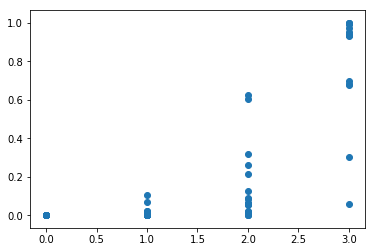

In [3]:
A = np.array(A)
plt.scatter(A[:,1],A[:,0])

In [4]:
A = pd.DataFrame(A)
writer = pd.ExcelWriter('C:/Users/16010/Desktop/kkka.xlsx')
A.to_excel(writer,'page_1',float_format='%.5f')
writer.save()
writer.close()

In [ ]:
file_str = 'C:/Users/16010/Desktop/aaa.xlsx'

import pandas as pd


data = pd.read_excel(file_str,header=None,sep=' ').values


In [15]:
def np_sigmoid(x):
    # TODO: Implement sigmoid function
    return 1/(1 + np.exp(-x))

w = [[2.2792215],[-0.04841435],[0.1191104],[3.4186428 ],[2.2234445]]
b = -3.5002658
w = np.array(w)

data = pd.read_excel('C:/Users/16010/Desktop/test.xlsx',header =None,sep=' ').values

for row in range(len(data)):
    if data[row][0] <= 236844.92: data[row][0] = 1.822531128
    elif data[row][0] > 236844.92 and data[row][0] <= 17741990.19: data[row][0] = -0.680075099
    elif data[row][0] > 17741990.19: data[row][0] = -1.355522702
        
    if data[row][1] <= -0.71404931: data[row][1] = 3.814961293
    elif data[row][1] > -0.71404931 and data[row][1] <= -0.26801377: data[row][1] = 2.20552338
    elif data[row][1] > -0.26801377 and data[row][1] <= 2.43137250: data[row][1] = -2.926739402
    elif data[row][1] > 2.43137250: data[row][1] = -1.355522702
        
    if data[row][2] <= -0.30841038: data[row][2] = 2.1102132
    elif data[row][2] > -0.30841038 and data[row][2] <= 0.08465820: data[row][2] = -0.528844129
    elif data[row][2] > 0.08465820 and data[row][2] <= 1.89545480: data[row][2] = -0.693147181
    elif data[row][2] > 1.89545480: data[row][2] = 0.010152371
        
    if data[row][3] <= 0.34924501: data[row][3] = 1.41706602
    elif data[row][3] > 0.34924501 and data[row][3] <= 0.46014173: data[row][3] = -1.718428196
    elif data[row][3] > 0.46014173 and data[row][3] <= 0.68449903: data[row][3] = -0.528844129
    elif data[row][3] > 0.68449903 and data[row][3] <= 0.76773242: data[row][3] = 1.011600912
    elif data[row][3] > 0.76773242: data[row][3] = 0.213093215
        
    if data[row][4] <= 1: data[row][4] = 0.679467077
    elif data[row][4] > 1 and data[row][4] <= 4: data[row][4] = -0.310154928
    elif data[row][4] > 4: data[row][4] = -0.407483272

print(data)

lab = 0.0002 
lbc = 0.0032
acc = 0
for row in range(len(data)):
    tag_pre = np_sigmoid(np.dot(data[row][0:5],w) + b)
    if(tag_pre <= lab and data[row][5] == 0): acc += 1
    elif(tag_pre <= lbc and data[row][5] == 1): acc += 1
    elif(tag_pre <= 0.5 and data[row][5] == 2): acc += 1
    elif(data[row][5] == 3): acc += 1
 
print(acc,'/',len(data))

[[-0.6800751  -2.9267394  -0.52884413  1.01160091 -0.40748327  2.        ]
 [-0.6800751  -2.9267394  -0.69314718  0.21309322  0.67946708  3.        ]
 [-0.6800751  -2.9267394  -0.69314718  0.21309322 -0.31015493  2.        ]
 [ 1.82253113 -2.9267394   0.01015237  0.21309322  0.67946708  3.        ]
 [-0.6800751  -1.3555227   0.01015237  0.21309322 -0.40748327  2.        ]
 [-1.3555227  -2.9267394  -0.69314718 -0.52884413 -0.40748327  0.        ]
 [-1.3555227  -1.3555227  -0.69314718  0.21309322  0.67946708  2.        ]
 [ 1.82253113  3.81496129 -0.52884413  0.21309322  0.67946708  3.        ]
 [-1.3555227   2.20552338 -0.69314718 -0.52884413 -0.31015493  1.        ]
 [-0.6800751  -2.9267394   0.01015237  0.21309322 -0.31015493  2.        ]
 [-1.3555227  -2.9267394  -0.69314718  0.21309322 -0.31015493  1.        ]
 [ 1.82253113 -2.9267394   0.01015237  0.21309322  0.67946708  3.        ]
 [ 1.82253113  2.20552338 -0.52884413 -0.52884413  0.67946708  3.        ]
 [-1.3555227  -2.9267394 

In [22]:
#knn降为2唯
from sklearn import datasets
import random
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt


#train = zipp[0:90]
#test = zipp[90:150]
#print(len(train))
#print(len(test))
#
#train = zip(*train)
#train = list(train)
#test = zip(*test)
#test = list(test)
##print(train)
##print('=======')
##print(test)
#
#train_d = list(train[0])
#train_t = np.array(list(train[1]))
#test_d = list(test[0])
#test_t = np.array(list(test[1]))

file_str = 'C:/Users/16010/Desktop/分数据集.xlsx'
data = pd.read_excel(file_str,header=None,sep=' ').values

m = data.shape[0]      #样本个数
n = data.shape[1] - 1    #特征个数

x_data = data[:,0:n]
y_data = data[:,n:n+1]

x_train = x_data[0:97]
x_test = x_data[97:124]
y_train = y_data[0:97]
y_test = y_data[97:124]

ss = StandardScaler()
zscore = ss.fit(x_train)
train_d = zscore.transform(x_train)
test_d = zscore.transform(x_test)

#pca = PCA(n_components=3)
#reduced_train_d = pca.fit_transform(x_train)
#reduced_test_d = pca.transform(x_test)

knc = KNeighborsClassifier()
#knc.fit(reduced_train_d,y_train)
#y_predict = knc.predict(reduced_test_d)
knc.fit(train_d,y_train)
y_predict = knc.predict(test_d)

acc = 0

#print(y_predict)
#print(test_t)

for i in range(26):
    if(y_predict[i] == y_test[i]): acc += 1
print('{}/{}'.format(acc,26))

#for i in range(90):
#    if(train_t[i] == 0):
#        plt.scatter(train_d[i][0],train_d[i][1],c='r',marker='o')
#    elif(train_t[i] == 1):
#        plt.scatter(train_d[i][0],train_d[i][1],c='g',marker='x')
#    elif(train_t[i] == 2):
#        plt.scatter(train_d[i][0],train_d[i][1],c='b',marker='s')
#plt.show()

15/26


c:\program files (x86)\microsoft visual studio\shared\python36_64\lib\site-packages\ipykernel_launcher.py:57: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [ ]:
print(data.shape)

In [ ]:
print(data[1])
print(type(data[1][0]))

In [19]:
file_str = 'C:/Users/16010/Desktop/分数据集.xlsx'
data = pd.read_excel(file_str,header=None,sep=' ').values

m = data.shape[0]      #样本个数
n = data.shape[1] - 1    #特征个数

x_data = data[:,0:n]
y_data = data[:,n:n+1]

x_train = x_data[0:97]
x_test = x_data[97:124]
y_train = y_data[0:97]
y_test = y_data[97:124]
#print(y_data)

#print(x_train)
#print(x_test)

[[ 1.29056331e+07  6.75470000e-01  6.08100000e-02  7.64390000e-01
   5.00000000e+00]
 [ 1.38068123e+06  1.40690000e-01  1.47396000e+00  9.95800000e-01
   1.00000000e+00]
 [ 2.02014269e+06  3.41050000e-01  1.89545000e+00  8.85490000e-01
   4.00000000e+00]
 [ 1.47000000e+05  1.25287000e+00  6.14320000e+00  1.00000000e+00
   1.00000000e+00]
 [ 2.78847395e+06  2.44296400e+01  8.56991980e+02  9.37770000e-01
   5.00000000e+00]
 [ 7.87976472e+07  2.71870000e-01  5.13850000e-01  6.20700000e-01
   7.00000000e+00]
 [ 1.12000368e+08  3.10794000e+00  2.03210000e-01  8.92120000e-01
   1.00000000e+00]
 [ 7.46737900e+04 -9.04870000e-01 -1.43900000e-02  1.00000000e+00
   1.00000000e+00]
 [ 1.86051534e+07 -3.20640000e-01  8.46600000e-02  5.15550000e-01
   4.00000000e+00]
 [ 8.97307570e+05  2.20220000e-01  4.15347000e+00  8.08680000e-01
   2.00000000e+00]
 [ 9.95877103e+07 -6.12800000e-02  7.84500000e-01  9.51690000e-01
   2.00000000e+00]
 [ 3.50000000e+04  2.43137000e+00  1.24000000e+02  1.00000000e+00

In [ ]:
print(type(x_data

In [ ]:
#[[ 0.66447735]
# [ 0.7919701 ]
# [ 0.64511156]
# [ 0.46574363]
# [ 0.7380962 ]
# [-1.0433519 ]
# [-0.4891426 ]
# [ 0.38100302]
# [-0.92065805]
# [ 0.7221076 ]
# [-0.02551536]
# [-0.5557054 ]
# [-0.6289967 ]
# [-0.9584505 ]
# [-0.74870723]
# [ 0.62209535]
# [-0.59010726]
# [ 0.6687074 ]
# [ 0.63370025]
# [ 0.941881  ]
# [-0.67656267]
# [ 1.2290127 ]]
#-1.289788
#loss0.08633512258529663

In [ ]:
pp = [[ 0.6594928 ]
 ,[ 0.566599  ]
 ,[ 0.4947146 ]
 ,[ 0.52830625]
 ,[ 0.63582224]
 ,[-0.87618876]
 ,[-0.59900796]
 ,[ 0.3143632 ]
 ,[-0.68572634]
 ,[ 0.6993294 ]
 ,[-0.08679271]
 ,[-0.33874357]
 ,[-0.49002394]
 ,[-0.7251007 ]
 ,[-0.58124673]
 ,[ 0.35423622]
 ,[-0.5549835 ]
 ,[ 0.5091424 ]
 ,[ 0.52213717]
 ,[ 0.5628332 ]
 ,[-0.43039176]
 ,[ 0.948583  ]]
pp_b = -1.0008357

In [ ]:
max = -1
min = 1
for it in pp:
    if it[0] < min: min = it[0]
    if it[0] > max: max = it[0]
if pp_b < min: min = pp_b
if pp_b > max: max = pp_b
print(max , min)

for it in pp:
    it[0] = (it[0] - min) / (max - min)
pp_b = (pp_b - min) / (max - min)

In [ ]:
pp

In [ ]:
pp_b